## Stock Market Prediction and Forecasting using Stacked LSTM

### Step 1: Data Collection

In [ ]:
import os

In [ ]:
file_path = r"C:\Users\Sourabh\Downloads\^NSEI.csv"
if not os.path.isfile(file_path):
    print(f"File not found: {file_path}")

File not found: C:\Users\Sourabh\Downloads\^NSEI.csv


In [ ]:
file_path = os.path.join("C:", "Users", "Sourabh", "Downloads", "^NSEI.csv")

In [ ]:
from google.colab import files


uploaded = files.upload()


Saving ^NSEI (2).csv to ^NSEI (2) (1).csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['^NSEI (2) (1).csv']))
print(df)


            Date         Open         High          Low        Close  \
0     17-01-2019  10920.84961  10930.65039  10844.65039  10905.20020   
1     18-01-2019  10914.84961  10928.20020  10852.20020  10906.95020   
2     21-01-2019  10919.34961  10987.45020  10885.75000  10961.84961   
3     22-01-2019  10949.79981  10949.79981  10864.15039  10922.75000   
4     23-01-2019  10931.04981  10944.79981  10811.95020  10831.50000   
...          ...          ...          ...          ...          ...   
1230  10-01-2024  21529.30078  21641.84961  21448.65039  21618.69922   
1231  11-01-2024  21688.00000  21726.50000  21593.75000  21647.19922   
1232  12-01-2024  21773.55078  21928.25000  21715.15039  21894.55078   
1233  15-01-2024  22053.15039  22115.55078  21963.55078  22097.44922   
1234  16-01-2024  22080.50000  22124.15039  21969.80078  22032.30078   

        Adj Close    Volume  
0     10905.20020  271700.0  
1     10906.95020  323800.0  
2     10961.84961  288800.0  
3     10922.750

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,17-01-2019,10920.84961,10930.65039,10844.65039,10905.20020,10905.20020,271700.0
1,18-01-2019,10914.84961,10928.20020,10852.20020,10906.95020,10906.95020,323800.0
2,21-01-2019,10919.34961,10987.45020,10885.75000,10961.84961,10961.84961,288800.0
3,22-01-2019,10949.79981,10949.79981,10864.15039,10922.75000,10922.75000,300800.0
4,23-01-2019,10931.04981,10944.79981,10811.95020,10831.50000,10831.50000,298900.0


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1230,10-01-2024,21529.30078,21641.84961,21448.65039,21618.69922,21618.69922,217000.0
1231,11-01-2024,21688.00000,21726.50000,21593.75000,21647.19922,21647.19922,212500.0
1232,12-01-2024,21773.55078,21928.25000,21715.15039,21894.55078,21894.55078,294700.0
1233,15-01-2024,22053.15039,22115.55078,21963.55078,22097.44922,22097.44922,345500.0
1234,16-01-2024,22080.50000,22124.15039,21969.80078,22032.30078,22032.30078,292400.0


In [ ]:
df1=df.reset_index()['Close']

In [ ]:
df1.shape

(1235,)

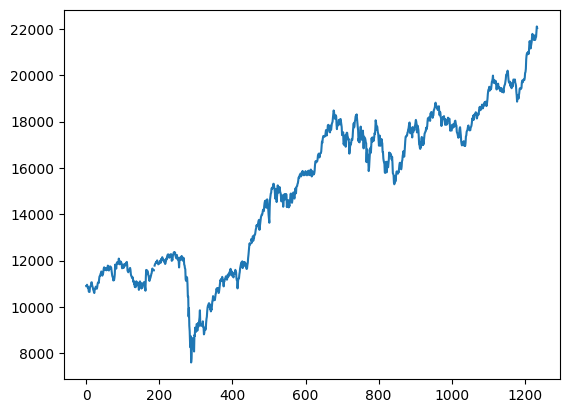

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

### -- LSTM are sensitive to the scale of the data, so we apply MinMax Scaler

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1

array([[0.22743873],
       [0.22755953],
       [0.23134904],
       ...,
       [0.98599464],
       [1.        ],
       [0.99550303]])

In [ ]:
df1.shape

(1235, 1)

## Step 2: Splitting Dataset into Train Split and Test Split

In [ ]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(802, 433)

In [ ]:
train_data

array([[0.22743873],
       [0.22755953],
       [0.23134904],
       [0.22865013],
       [0.22235147],
       [0.22361464],
       [0.21883456],
       [0.21062041],
       [0.20997504],
       [0.2099474 ],
       [0.22231352],
       [0.22664149],
       [0.22792535],
       [0.22945081],
       [0.23829314],
       [0.23877289],
       [0.23008931],
       [0.22630667],
       [0.22234459],
       [0.21645314],
       [0.21495876],
       [0.20919849],
       [0.20667208],
       [0.21572149],
       [0.21947649],
       [0.21960079],
       [0.22570613],
       [0.22261375],
       [0.22063619],
       [0.21965944],
       [0.22456031],
       [0.23311616],
       [0.23764083],
       [0.23799978],
       [0.23642599],
       [0.24558231],
       [0.25477321],
       [0.25756878],
       [0.25767576],
       [0.26344634],
       [0.26588647],
       [0.27073214],
       [0.26994865],
       [0.26552064],
       [0.25843505],
       [0.26733946],
       [0.26470264],
       [0.273

## -- Convert an array of values into a dataset matrix

In [ ]:
import numpy
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[1:(i+time_step),0]          ### i=0; 0,1,2,3,...
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
        return numpy.array(dataX),numpy.array(dataY)

## -- Reshape into X=t,t+1,t+2,t+3 and y=t+4

In [ ]:
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [ ]:
print(X_train)

[[0.22755953 0.23134904 0.22865013 0.22235147 0.22361464 0.21883456
  0.21062041 0.20997504 0.2099474  0.22231352 0.22664149 0.22792535
  0.22945081 0.23829314 0.23877289 0.23008931 0.22630667 0.22234459
  0.21645314 0.21495876 0.20919849 0.20667208 0.21572149 0.21947649
  0.21960079 0.22570613 0.22261375 0.22063619 0.21965944 0.22456031
  0.23311616 0.23764083 0.23799978 0.23642599 0.24558231 0.25477321
  0.25756878 0.25767576 0.26344634 0.26588647 0.27073214 0.26994865
  0.26552064 0.25843505 0.26733946 0.26470264 0.2733275  0.2801715
  0.28321211 0.27843202 0.27526024 0.27995061 0.27570892 0.28036476
  0.27431457 0.27517052 0.27839751 0.28163481 0.28831663 0.28594553
  0.27501521 0.27373823 0.28410601 0.27828359 0.28607327 0.28562459
  0.28400935 0.28314652 0.2752775  0.26835072 0.258794   0.2548146
  0.25323393 0.24421216 0.24930974 0.24481958 0.2517291  0.26208657
  0.29115359 0.28292906 0.28491707 0.27933624 0.29224763 0.29781464
  0.29809074 0.29342108 0.29927458 0.29768002 0.30

In [ ]:
print(X_train.shape),print(y_train.shape)

(1, 99)
(1,)


(None, None)

In [ ]:
print(X_test.shape),print(y_test.shape)

(1, 99)
(1,)


(None, None)

## -- Reshape input to be [samples, time steps, features] which is required for LSTM

In [ ]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

## Step 3: Create a Stacked LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(99,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 99, 50)            10400     
                                                                 
 lstm_4 (LSTM)               (None, 99, 50)            20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
1/1 [==============================] - 9s 9s/step - loss: 0.0689 - val_loss: 0.3261
Epoch 2/100
1/1 [==============================] - 0s 141ms/step - loss: 0.0437 - val_loss: 0.1968
Epoch 3/100
1/1 [==============================] - 0s 132ms/step - loss: 0.0205 - val_loss: 0.0790
Epoch 4/100
1/1 [==============================] - 0s 150ms/step - loss: 0.0033 - val_loss: 0.0064
Epoch 5/100
1/1 [==============================] - 0s 145ms/step - loss: 0.0028 - val_loss: 6.4719e-04
Epoch 6/100
1/1 [==============================] - 0s 156ms/step - loss: 0.0142 - val_loss: 1.0227e-04
Epoch 7/100
1/1 [==============================] - 0s 161ms/step - loss: 0.0107 - val_loss: 0.0084
Epoch 8/100
1/1 [==============================] - 0s 150ms/step - loss: 0.0036 - val_loss: 0.0308
Epoch 9/100
1/1 [==============================] - 0s 138ms/step - loss: 2.2042e-04 - val_loss: 0.0593
Epoch 10/100
1/1 [==============================] - 0s 139ms/step - loss: 4.5654e-04 - val_loss: 0.0

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.15.0'

## -- Implementing Prediction and Checking Performnce Metrics

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

1/1 [==============================] - 0s 35ms/step


## -- Transform Back to Original Form

In [ ]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

## -- Calculating RMSE Performance Metrics

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

11681.830593906967

## -- Test Data RMSE

In [ ]:
math.sqrt(mean_squared_error(y_test,test_predict))

14308.611004848286

## Step 3.5: Plotting

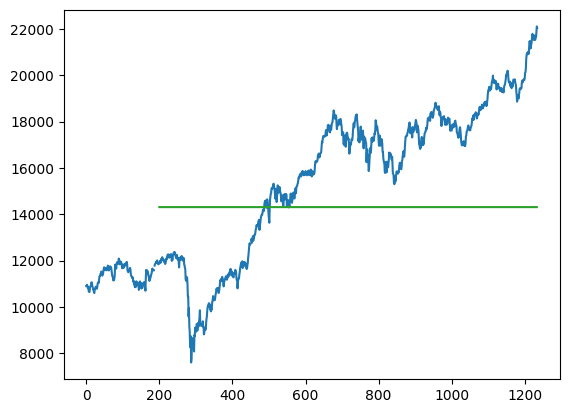

In [ ]:
## Shift Train Predictions for Plotting
look_back=99
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict
## Shift Test Predictions for Plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:,:] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] = test_predict
## Plot Baseline And Predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Step 4: Prediction for next 30 days and plotting of the output

In [ ]:
len(test_data)

433

In [ ]:
x_input=test_data[333:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.8135595459837958,
 0.8168418077431533,
 0.8128865380509346,
 0.8045413473647257,
 0.8073196621644857,
 0.8098460034844471,
 0.8101772497058267,
 0.8037130299088965,
 0.816241331428312,
 0.8226953049383138,
 0.8258773975774732,
 0.828372730833476,
 0.8363797995731573,
 0.8427922495290984,
 0.8549685430501038,
 0.8547510827976313,
 0.8600523683555724,
 0.8623371170842505,
 0.8684977281619796,
 0.8644217967757056,
 0.8484145350214906,
 0.8374358235683875,
 0.8327351489268745,
 0.832755910703905,
 0.8320758924443091,
 0.8356480114725723,
 0.8223329160513885,
 0.8302537017227546,
 0.8226917997749464,
 0.816296471831082,
 0.8238652495040378,
 0.8313028499928367,
 0.8215597389983295,
 0.8338119346991352,
 0.842198648939405,
 0.8410010668715026,
 0.8380364344848156,
 0.836704170069389,
 0.84220902982792,
 0.8325176886744022,
 0.8293148342582121,
 0.8236512944149325,
 0.8056422654757972,
 0.7946256702335871,
 0.776340535475842,
 0.789455561859803,
 0.79591991625832,
 0.7916885407474917,
 0.7

## -- Demonstrating the Prediction for next 30 Days

In [ ]:
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        ## print(test_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        ## print(x_input)
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape(1,n_steps,1)
        yhat=model.predict(x_input,verbose=0)
        print("{} day input {}".format(i,yhat))
        ## print(temp_input)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape(1,n_steps,1)
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

[nan]
101
1 day input [0.81684181 0.81288654 0.80454135 0.80731966 0.809846   0.81017725
 0.80371303 0.81624133 0.8226953  0.8258774  0.82837273 0.8363798
 0.84279225 0.85496854 0.85475108 0.86005237 0.86233712 0.86849773
 0.8644218  0.84841454 0.83743582 0.83273515 0.83275591 0.83207589
 0.83564801 0.82233292 0.8302537  0.8226918  0.81629647 0.82386525
 0.83130285 0.82155974 0.83381193 0.84219865 0.84100107 0.83803643
 0.83670417 0.84220903 0.83251769 0.82931483 0.82365129 0.80564227
 0.79462567 0.77634054 0.78945556 0.79591992 0.79168854 0.78544515
 0.79539184 0.80211154 0.8146157  0.81426707 0.81680729 0.81348027
 0.81555444 0.8168108  0.83281793 0.83901305 0.83670768 0.83409842
 0.84026941 0.84223316 0.84155328 0.84104933 0.84760684 0.86188845
 0.86441142 0.87371273 0.90262794 0.91424501 0.91994657 0.91742373
 0.92213479 0.92404677 0.91778612 0.91916315 0.93685805 0.95576793
 0.95314492 0.95552283 0.93461132 0.94185222 0.94836484 0.95471177
 0.96944204 0.97799782 0.97473295        

## -- Plotting Prediction for next 30 days

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

1235

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)

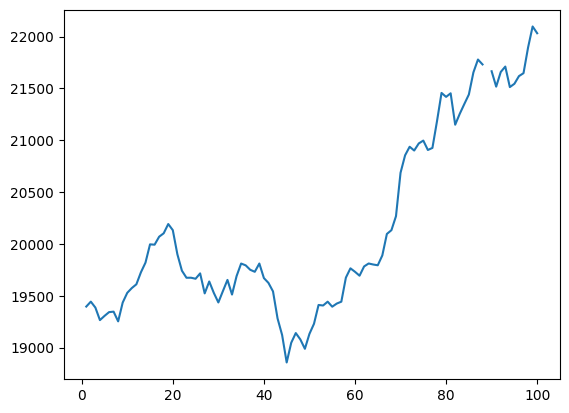

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1135:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

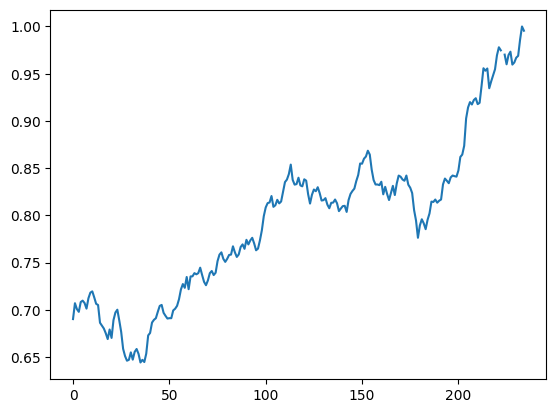

In [ ]:
plt.plot(df3[1000:])

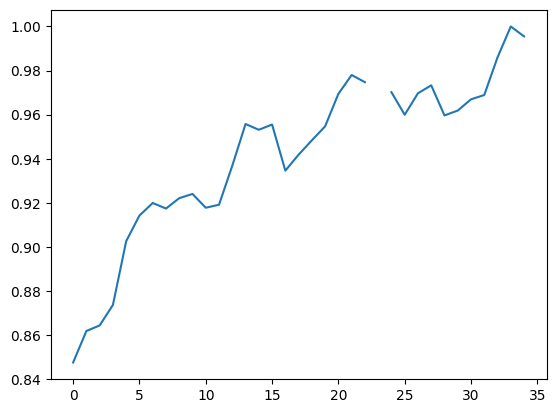

In [ ]:
plt.plot(df3[1200:])

## Step 5: Prediction for next 7 days and plotting of the output

## -- Demonstrating the Prediction for next 7 Days

In [ ]:
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<7):
    if(len(temp_input)>100):
        ## print(test_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        ## print(x_input)
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape(1,n_steps,1)
        yhat=model.predict(x_input,verbose=0)
        print("{} day input {}".format(i,yhat))
        ## print(temp_input)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape(1,n_steps,1)
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

0 day input [0.82386525 0.83130285 0.82155974 0.83381193 0.84219865 0.84100107
 0.83803643 0.83670417 0.84220903 0.83251769 0.82931483 0.82365129
 0.80564227 0.79462567 0.77634054 0.78945556 0.79591992 0.79168854
 0.78544515 0.79539184 0.80211154 0.8146157  0.81426707 0.81680729
 0.81348027 0.81555444 0.8168108  0.83281793 0.83901305 0.83670768
 0.83409842 0.84026941 0.84223316 0.84155328 0.84104933 0.84760684
 0.86188845 0.86441142 0.87371273 0.90262794 0.91424501 0.91994657
 0.91742373 0.92213479 0.92404677 0.91778612 0.91916315 0.93685805
 0.95576793 0.95314492 0.95552283 0.93461132 0.94185222 0.94836484
 0.95471177 0.96944204 0.97799782 0.97473295        nan 0.97020484
 0.95995778 0.96970777 0.97331103 0.95965754 0.96185601 0.96695358
 0.96892084 0.98599464 1.         0.99550303        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan      

## -- Plotting Prediction for next 7 days

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,108)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

1235

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)

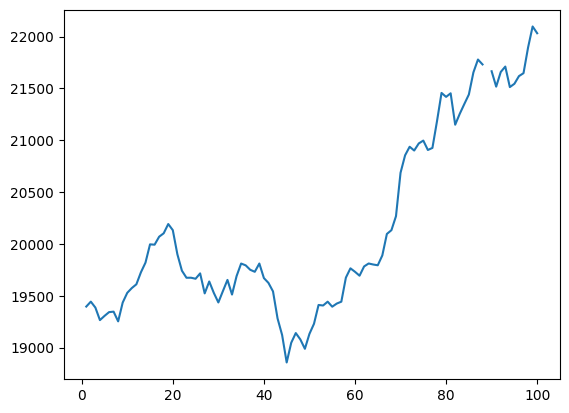

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1135:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

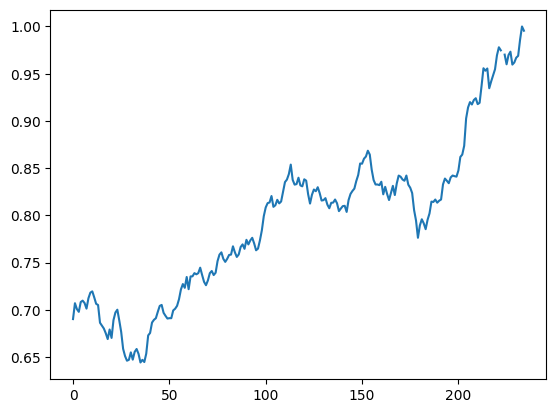

In [ ]:
plt.plot(df3[1000:])

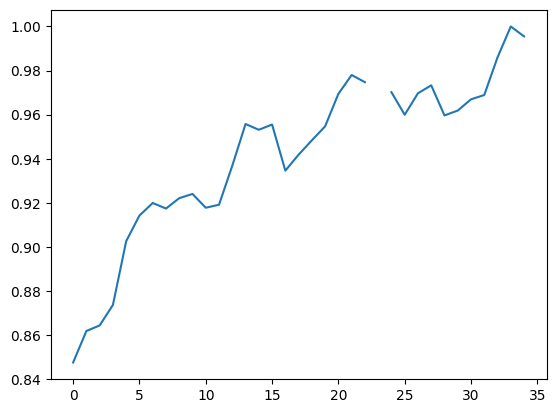

In [ ]:
plt.plot(df3[1200:])

## Step 6: Prediction for next 365 days and plotting of the output

## -- Demonstrating the Prediction for next 365 Days

In [ ]:
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<365):
    if(len(temp_input)>100):
        ## print(test_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        ## print(x_input)
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape(1,n_steps,1)
        yhat=model.predict(x_input,verbose=0)
        print("{} day input {}".format(i,yhat))
        ## print(temp_input)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape(1,n_steps,1)
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
print(lst_output)

0 day input [0.83670417 0.84220903 0.83251769 0.82931483 0.82365129 0.80564227
 0.79462567 0.77634054 0.78945556 0.79591992 0.79168854 0.78544515
 0.79539184 0.80211154 0.8146157  0.81426707 0.81680729 0.81348027
 0.81555444 0.8168108  0.83281793 0.83901305 0.83670768 0.83409842
 0.84026941 0.84223316 0.84155328 0.84104933 0.84760684 0.86188845
 0.86441142 0.87371273 0.90262794 0.91424501 0.91994657 0.91742373
 0.92213479 0.92404677 0.91778612 0.91916315 0.93685805 0.95576793
 0.95314492 0.95552283 0.93461132 0.94185222 0.94836484 0.95471177
 0.96944204 0.97799782 0.97473295        nan 0.97020484 0.95995778
 0.96970777 0.97331103 0.95965754 0.96185601 0.96695358 0.96892084
 0.98599464 1.         0.99550303        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan      

## -- Plotting Prediction for next 365 days

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,466)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

1235

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)

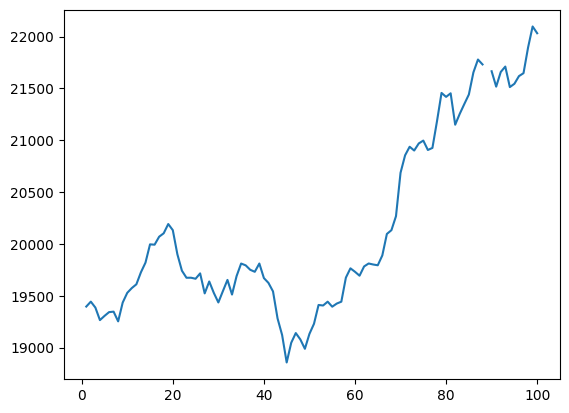

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1135:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

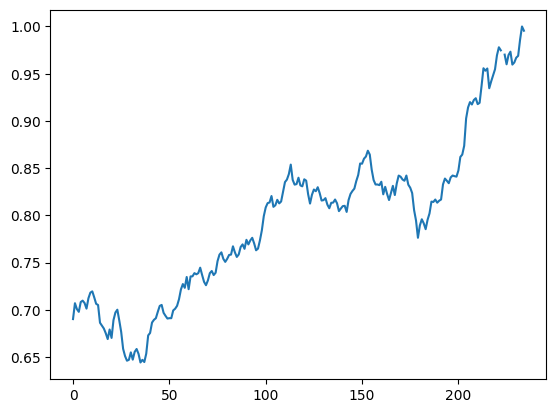

In [ ]:
plt.plot(df3[1000:])

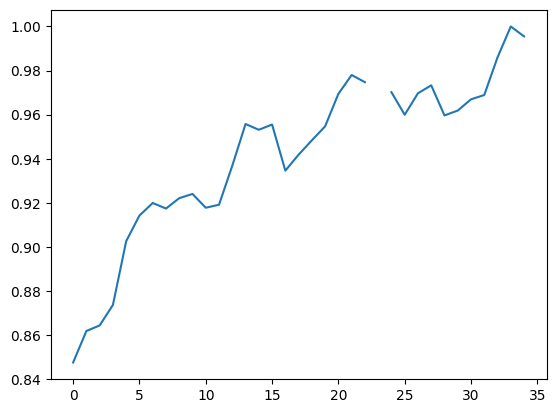

In [ ]:
plt.plot(df3[1200:])